# Image Processing Assignment
For vertical and horizontal edge detection, I used Sobel function from CV2. 
For superimposed, I defined a function that takes a small part of the image and kernel and parses through the entire image to get convolution. 

In [1]:
# imports
import cv2
import matplotlib.pyplot as plt
import numpy as np
from skimage.exposure import rescale_intensity

In [2]:
# displaying any image
def display_img(img):
    plt.imshow(img)
    plt.show()

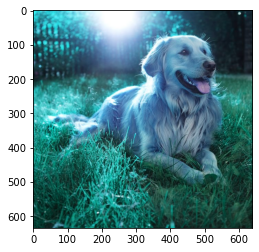

In [3]:
# loading the original image
image = cv2.imread('dog.jpg')
display_img(image)

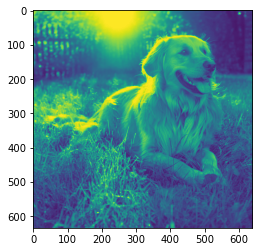

In [4]:
# convert to grayscale
gray_img = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
display_img(gray_img)

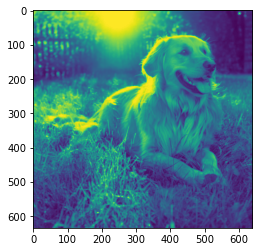

In [5]:
# applying gaussian blur before convolution
blur_img = cv2.GaussianBlur(gray_img, (3,3), 0)
display_img(blur_img)

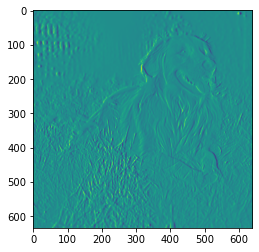

In [6]:
# vertical convolution (sobel x)
sobel_x = cv2.Sobel(src=blur_img, ddepth=cv2.CV_64F, dx=1, dy=0, ksize=5)
display_img(sobel_x)

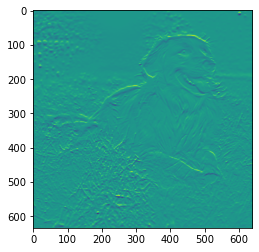

In [7]:
# horizontal convolution (sobel y)
sobel_y = cv2.Sobel(src=blur_img, ddepth=cv2.CV_64F, dx=0, dy=1, ksize=5)
display_img(sobel_y)

In [8]:
# Defining a convolute function that accept the image and kernel for convolution
def convolute(img, kernel):
    (i_height, i_width) = img.shape[:2]
    (k_height, k_width) = kernel.shape[:2]
    pad = (k_width-1) // 2
    img = cv2.copyMakeBorder(img, pad, pad, pad, pad, cv2.BORDER_REPLICATE)
    out = np.zeros((i_height, i_width), dtype='float64')
    for i in np.arange(pad, i_height+pad):
        for j in np.arange(pad, i_width+pad):
            reg_of_interest = img[i-pad:i + pad + 1, j-pad:j + pad + 1]
            convolute = (reg_of_interest * kernel).sum()

            out[i-pad, j-pad] = convolute
    out = rescale_intensity(out, in_range=(0,255))
    out = (out*255).astype("uint16")
    
    return out

In [9]:
# creating laplacian operator for superimposed convolution
lap_kernel = np.array(([0,1,0], 
                       [1,-4,1], 
                       [0,1,0]), dtype='int')

In [10]:
# splitting into bgr and pasing to convolute()
b, g, r = cv2.split(image)
img_list = [b, g,r]
conv_list = []
for i in range(len(img_list)):
    conv_list.append(convolute(img_list[i], lap_kernel))

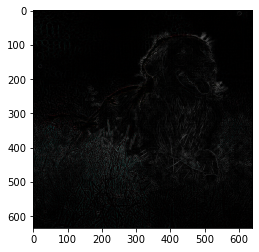

In [11]:
# getting the superimposed convoluted image
super_convoluted = cv2.merge((conv_list[0], conv_list[1], conv_list[2]))
display_img(super_convoluted)